This are a demo and instructions for using the graph module, Laplacians for Julia. 


In [1]:
using Laplacians

In [2]:
using PyPlot

In [3]:
VERSION

v"0.4.3"

# Graph Generators

In [4]:
gr = grid2(4)

16x16 sparse matrix with 48 Float64 entries:
	[2 ,  1]  =  1.0
	[5 ,  1]  =  1.0
	[1 ,  2]  =  1.0
	[3 ,  2]  =  1.0
	[6 ,  2]  =  1.0
	[2 ,  3]  =  1.0
	[4 ,  3]  =  1.0
	[7 ,  3]  =  1.0
	[3 ,  4]  =  1.0
	[8 ,  4]  =  1.0
	⋮
	[16, 12]  =  1.0
	[9 , 13]  =  1.0
	[14, 13]  =  1.0
	[10, 14]  =  1.0
	[13, 14]  =  1.0
	[15, 14]  =  1.0
	[11, 15]  =  1.0
	[14, 15]  =  1.0
	[16, 15]  =  1.0
	[12, 16]  =  1.0
	[15, 16]  =  1.0

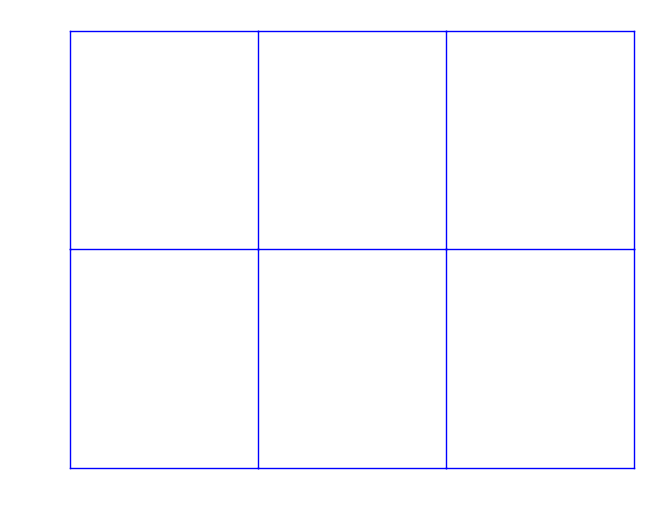

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31af02510>

In [5]:
gr = grid2(4,3)
(x,y) = grid2coords(4,3)
p = plotGraph(gr,x,y;dots=false)

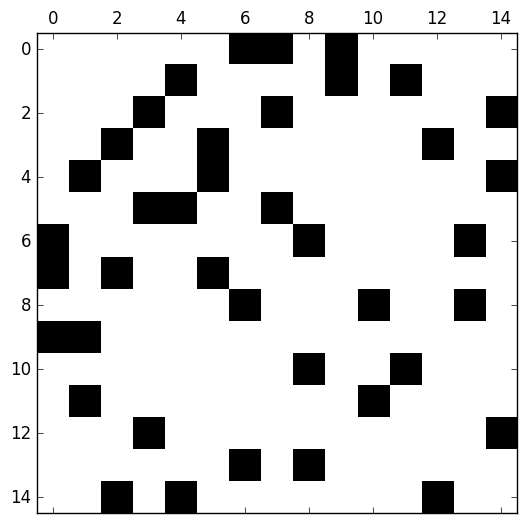

PyObject <matplotlib.image.AxesImage object at 0x31b035610>

In [6]:
gr = randRegular(15,3)
spy(gr)

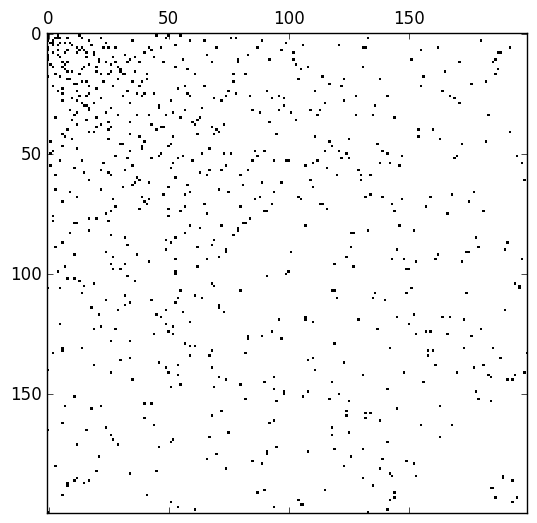

PyObject <matplotlib.image.AxesImage object at 0x30e5d7e90>

In [7]:
gr = grownGraph(200,2)
spy(gr)

In [8]:
gr = full(hyperCube(3))

8x8 Array{Float64,2}:
 0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0

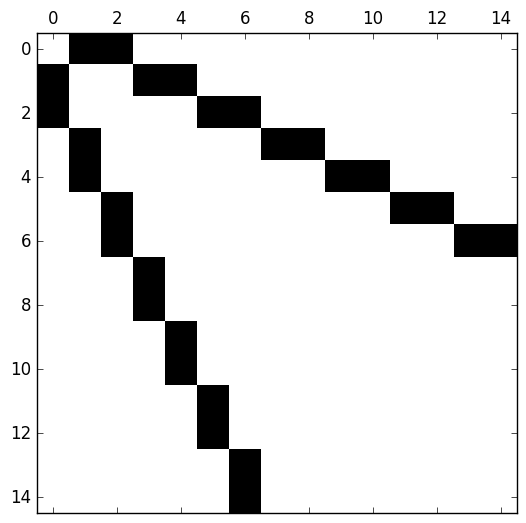

PyObject <matplotlib.image.AxesImage object at 0x30e5d7fd0>

In [9]:
a = completeBinaryTree(15)
spy(a)

In [10]:
a0 = completeBinaryTree(3)
a1 = completeBinaryTree(5)
a = productGraph(a0,a1)
[eig(full(a))[1]';
sort(kron(eig(full(a0))[1],ones(5)) + kron(ones(3),eig(full(a1))[1]))']

2x15 Array{Float64,2}:
 -3.26197  -2.17958  -1.84776  …  1.41421  1.84776  2.17958  3.26197
 -3.26197  -2.17958  -1.84776     1.41421  1.84776  2.17958  3.26197

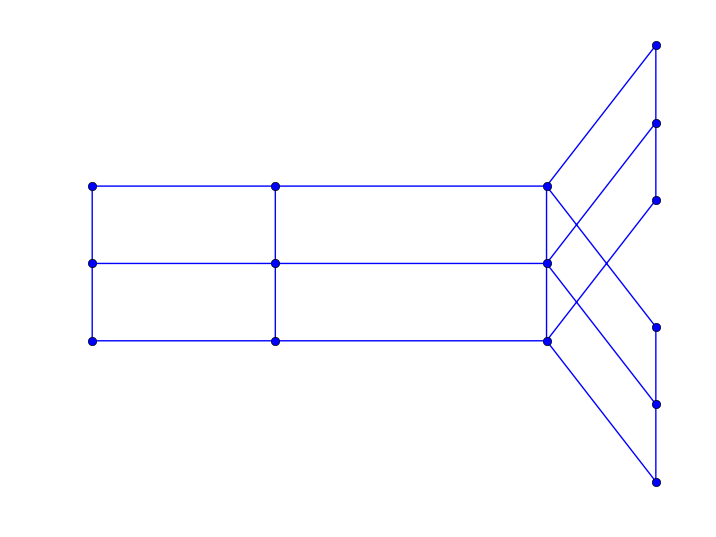

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3184b2210>

In [11]:
spectralDrawing(a)

## Chimeric Graphs

The chimeric graphs combine together elementary graphs in strange ways.  If you want to really test your code, try it on a couple thousand of the chimeric graphs.  We also produce graphs with weights.  Here are two.

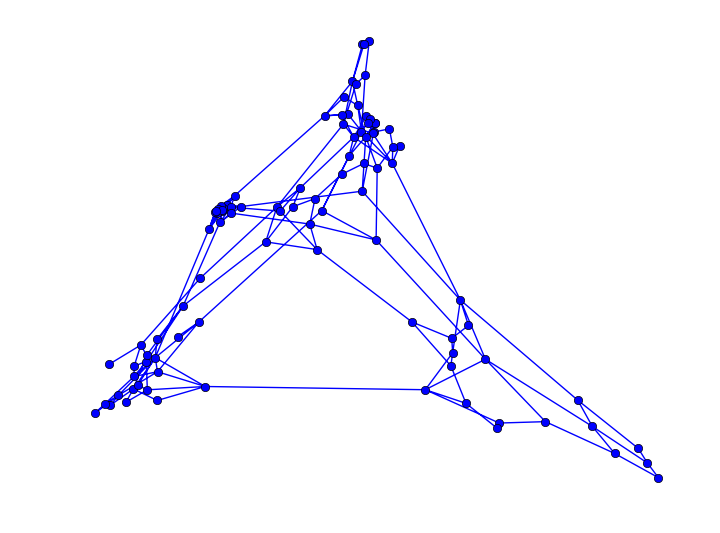

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31cd38e50>

In [12]:
a = chimera(100,1)
spectralDrawing(a)

In [13]:
a = wtedChimera(100)

100x100 sparse matrix with 248 Float64 entries:
	[85 ,   1]  =  1.0
	[33 ,   2]  =  1.0
	[68 ,   3]  =  1.0
	[91 ,   3]  =  1.0
	[23 ,   4]  =  1.0
	[30 ,   4]  =  1.0
	[9  ,   5]  =  1.0
	[21 ,   5]  =  1.0
	[62 ,   5]  =  1.0
	[67 ,   6]  =  1.0
	⋮
	[76 ,  96]  =  1.0
	[89 ,  96]  =  1.0
	[40 ,  97]  =  1.0
	[41 ,  97]  =  1.0
	[87 ,  97]  =  1.0
	[81 ,  98]  =  1.0
	[17 ,  99]  =  0.0961451
	[92 ,  99]  =  0.0961451
	[25 , 100]  =  1.0
	[70 , 100]  =  1.0
	[73 , 100]  =  1.0

# Computing Components, and demo of percolation

The following code computes a 30-by-30 grid graph, samples edges with probability 1/2, and then computes the components.

In [14]:
gr = grid2(30);
grs = subsampleEdges(gr,.5);


In [15]:
co = components(grs)

900-element Array{Int64,1}:
   1
   1
   2
   3
   3
   3
   3
   3
   4
   5
   6
   3
   3
   ⋮
 107
   9
   9
 108
 108
 108
 108
   9
   9
   9
 104
 104

In [16]:
comps = vecToComps(co)

108-element Array{Array{Int64,1},1}:
 [1,2,31,32]                                                                
 [3]                                                                        
 [4,5,6,7,8,12,13,14,15,16  …  312,313,314,315,316,343,344,345,373,374]     
 [9]                                                                        
 [10,40,41]                                                                 
 [11]                                                                       
 [20]                                                                       
 [21,22,51]                                                                 
 [23,24,25,26,27,52,53,54,55,56  …  883,884,885,886,887,890,891,896,897,898]
 [28]                                                                       
 [29,30,59,60]                                                              
 [33,34,61,62,63,64,93]                                                     
 [37]                                  

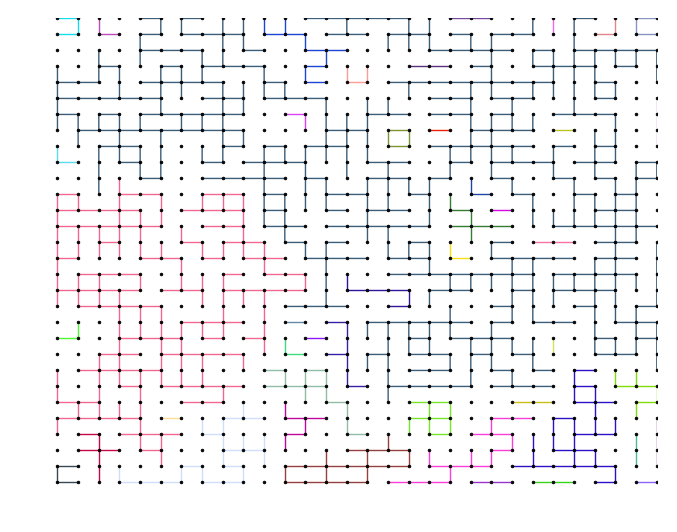

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d712ed0>

In [17]:
(x,y) = grid2coords(30,30)
for i = 1:length(comps)
    ind = comps[i]
    
    plotGraph(grs[ind,ind],x[ind],y[ind],rand(3);dots=false,setaxis=false)
end
pm = plot(x,y,marker="o",linestyle="none",color="black",markersize=2)

# Reading and Writing graphs

We can read and write graphs as ijv lists.  These routines just want the adjacency matrix, and only store the upper-triangular portion.

In [18]:
a = wtedChimera(15,2)
writeIJV("aGraph.ijv",a)
run(`cat aGraph.ijv`)

2,3,4.08884460438079
2,5,4.681030567282729
4,6,0.6850619046559718
6,7,2.0196981409441053
1,8,1.0657881304817831
4,9,1.6400643213315782
5,9,3.9026358441621327
7,10,1.5521872975322635
8,10,1.0896312289722436
1,11,1.0978102875273188
8,12,0.840913232394067
9,12,1.608897385997532
7,13,1.7009270839502282
11,13,1.2703931724357442
12,13,0.39745778299614126
3,14,4.392948847421956
5,14,4.9851348103238955
6,14,3.4076251921493124
1,15,0.6688478402865581
4,15,0.4751398775328884
11,15,0.4289624472407607


We can, of course, read this back in.

In [19]:
a2 = readIJV("aGraph.ijv")
a2-a

15x15 sparse matrix with 0 Float64 entries:

You can use routines like this to communicate with Matlab.
First, you need to tell Matlab where to find Julia.  Hopefully it is in your search path.
If not, we will try to find it.  And, tell Matlab where to find some m-files.
<pre>
>> cd('~/.julia/v0.4/Laplacians/matlab')
>> init
>> a = readIJV('aGraph.ijv')

a =

   (8,1)       1.0658
  (11,1)       1.0978
  (15,1)       0.6688
   (3,2)       4.0888
   (5,2)       4.6810
   (2,3)       4.0888
  (14,3)       4.3929
   (6,4)       0.6851
   (9,4)       1.6401
  (15,4)       0.4751
   (2,5)       4.6810
   (9,5)       3.9026
  (14,5)       4.9851
   (4,6)       0.6851
   (7,6)       2.0197
  (14,6)       3.4076
   (6,7)       2.0197
  (10,7)       1.5522
  (13,7)       1.7009
   (1,8)       1.0658
  (10,8)       1.0896
  (12,8)       0.8409
   (4,9)       1.6401
   (5,9)       3.9026
  (12,9)       1.6089
   (7,10)      1.5522
   (8,10)      1.0896
   (1,11)      1.0978
  (13,11)      1.2704
  (15,11)      0.4290
   (8,12)      0.8409
   (9,12)      1.6089
  (13,12)      0.3975
   (7,13)      1.7009
  (11,13)      1.2704
  (12,13)      0.3975
   (3,14)      4.3929
   (5,14)      4.9851
   (6,14)      3.4076
   (1,15)      0.6688
   (4,15)      0.4751
  (11,15)      0.4290
</pre>

You can also save graphs from Matlab, and read them back in to Julia.
<pre>
>> a2 = 2*a;
>> writeIJV('a2Graph.ijv',a2);
</pre>


In [20]:
a2 = readIJV("a2Graph.ijv")
a2 - 2*a

15x15 sparse matrix with 42 Float64 entries:
	[8 ,  1]  =  -9.63566e-10
	[11,  1]  =  4.94536e-9
	[15,  1]  =  -5.73116e-10
	[3 ,  2]  =  1.23842e-9
	[5 ,  2]  =  -4.56546e-9
	[2 ,  3]  =  1.23842e-9
	[14,  3]  =  -4.84391e-9
	[6 ,  4]  =  6.88056e-10
	[9 ,  4]  =  -2.66316e-9
	[15,  4]  =  -6.57768e-11
	⋮
	[9 , 12]  =  -1.99506e-9
	[13, 12]  =  7.71749e-12
	[7 , 13]  =  2.09954e-9
	[11, 13]  =  -4.87149e-9
	[12, 13]  =  7.71749e-12
	[3 , 14]  =  -4.84391e-9
	[5 , 14]  =  -6.47791e-10
	[6 , 14]  =  -4.29862e-9
	[1 , 15]  =  -5.73116e-10
	[4 , 15]  =  -6.57768e-11
	[11, 15]  =  -4.81521e-10

# Shortest Paths

I will now compare the running time of the shortest paths code that I wrote in Julia against matlab_bgl and my java code.   It could be sped up some more, but this proves the point that we can write fast code in Julia.  You may notice that we should speed up chimera.

In [21]:
a = wtedChimera(1000000,1);

In [22]:
@time dists, pArray = shortestPaths(a,1)

([0.0,37.0,46.0,46.0,45.0,36.0,38.0,29.0,12.0,53.0  …  38.0,47.0,44.0,53.0,45.0,49.0,48.0,396.554,42.0,25.0],[1,942306,123002,93411,121433,493632,90085,249191,183055,851650  …  789807,827565,768543,514077,93172,616807,506489,76973,898269,692917])

Here are the results in Matlab, using matlab_bgl.
<pre>
>> a = wtedChimera(1000000,1);
>> tic; [d,pa] = shortest_paths(a,1); toc
Elapsed time is 2.414358 seconds.
</pre>

This is a very clear win for Julia!  But, it turns out that it wasn't an idential comparision: the shortest path code in Julia treats edges weights as reciprocals of distances, whereas the matlab code treats weights as distances.  So, go make a fair comparison, we should take the reciprocals in one of them.  Let's run 10 times, taking reciprocals in Julia.

In [23]:
time = 0
for i in 1:10
    a = wtedChimera(1000000,i);
    a.nzval = 1./a.nzval;
    tic()
    dists, pArray = shortestPaths(a,1)
    time = time + toc()
end
println("Total time = ", time)

1.020457 seconds (44.35 k allocations: 56.226 MB, 0.97% gc time)
elapsed time: 1.015316095 seconds
elapsed time: 2.274715324 seconds
elapsed time: 0.957904388 seconds
elapsed time: 0.951643013 seconds
elapsed time: 2.870632639 seconds
elapsed time: 1.941429209 seconds
elapsed time: 1.020187433 seconds
elapsed time: 0.959340244 seconds
elapsed time: 1.049877787 seconds
elapsed time: 0.934991434 seconds
Total time = 13.976037566


So that you can check what I'm saying about distances being reciprocals of weights, here are the distances to the first 5 nodes in the last graph.  I'll compute the same ones in Matlab.

In [24]:
dists[1:5]

5-element Array{Float64,1}:
  0.0   
 53.3683
 75.3303
 53.5186
 49.1598

<pre>
>> time = 0;
>> for i = 1:10
a = wtedChimera(1000000,i);
tic; [d,pa] = shortest_paths(a,1); this = toc;
fprintf([num2str(this), ' seconds\n']);
time = time + this;
end

2.3238 seconds
3.3475 seconds
1.6888 seconds
2.9162 seconds
4.4944 seconds
4.7069 seconds
2.6662 seconds
1.7989 seconds
2.7447 seconds
2.9934 seconds

>> time

time =

   29.6808
   
>> d(1:5)

ans =

         0
   53.3683
   75.2115
   53.5149
   49.1598   
</pre>

# Minimum Spanning Trees

We will also compare the running time of mst code.  We will see that the Julia code is over twice as fast as the matlab_bgl.

In [25]:
a = wtedChimera(1000000,11)
@time tree = kruskal(a);

  1.835834 seconds (54.59 k allocations: 261.168 MB, 9.79% gc time)


<pre>
>> a = wtedChimera(1000000,11);
>> tic; t = kruskal_mst(a); toc
Elapsed time is 7.008127 seconds.
</pre>

By default, this computes the minimum spanning tree.  To get the max, do this.

In [27]:
@show sum(triu(tree).nzval)
maxTree = kruskal(a,kind=:max)
@show sum(triu(maxTree).nzval)

sum(triu(tree).nzval) = 716230.2035281955
sum(triu(maxTree).nzval) = 2.8479018930008933e6

2.8479018930008933e6

# Spectral Graph Drawing

In [28]:
la = lap(grid2(3))

9x9 sparse matrix with 33 Float64 entries:
	[1, 1]  =  2.0
	[2, 1]  =  -1.0
	[4, 1]  =  -1.0
	[1, 2]  =  -1.0
	[2, 2]  =  3.0
	[3, 2]  =  -1.0
	[5, 2]  =  -1.0
	[2, 3]  =  -1.0
	[3, 3]  =  2.0
	[6, 3]  =  -1.0
	⋮
	[9, 6]  =  -1.0
	[4, 7]  =  -1.0
	[7, 7]  =  2.0
	[8, 7]  =  -1.0
	[5, 8]  =  -1.0
	[7, 8]  =  -1.0
	[8, 8]  =  3.0
	[9, 8]  =  -1.0
	[6, 9]  =  -1.0
	[8, 9]  =  -1.0
	[9, 9]  =  2.0

In [29]:
E = eigs(la, nev = 3, which=:SR)
V = E[2]

9x3 Array{Float64,2}:
 0.333333   0.53916      -0.206495   
 0.333333   0.372827      0.166332   
 0.333333   0.206495      0.53916    
 0.333333   0.166332     -0.372827   
 0.333333   5.55112e-17   2.77556e-17
 0.333333  -0.166332      0.372827   
 0.333333  -0.206495     -0.53916    
 0.333333  -0.372827     -0.166332   
 0.333333  -0.53916       0.206495   

You would think that you should use
<pre>
E = eigs(la, nev = 3, which=:SM)
</pre>
But, that gives horrible results.

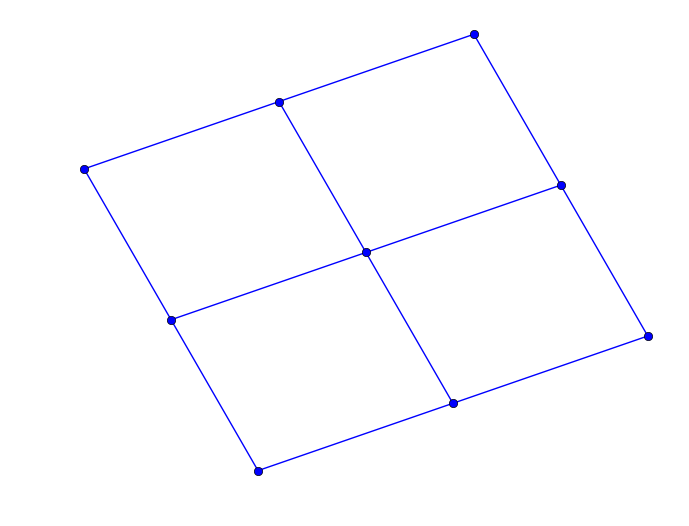

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31db42e50>

In [30]:
plotGraph(la,V[:,2],V[:,3])

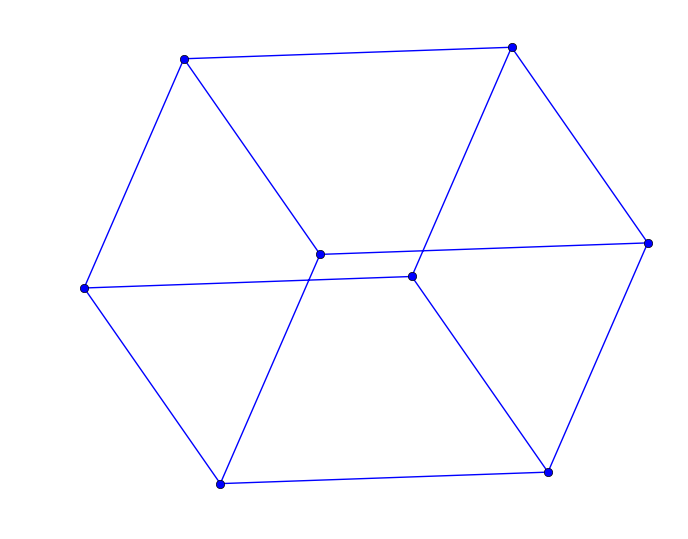

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e8354d0>

In [31]:
a = hyperCube(3)
la = lap(a)
E = eigs(la, nev = 3, which=:SR)
V = E[2]
plotGraph(a,V[:,2],V[:,3])

# Here is a look under the hood of sparse matrices

In [32]:
a = grid2(5)
typeof(a)

SparseMatrixCSC{Float64,Int64}

In [33]:
fieldnames(SparseMatrixCSC)

5-element Array{Symbol,1}:
 :m     
 :n     
 :colptr
 :rowval
 :nzval 